In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# volumes in cm
V_canister = (4.5/2)**2 * np.pi * 10
print("V_canister:", V_canister)
V_tube = (0.2/2)**2 * np.pi * 63
print("V_tube:", V_tube)

A_piston = (3.25/2)**2 * np.pi
print("A_piston:", A_piston)
addition_V_piston = A_piston * 0.5
print("addition_V_piston", addition_V_piston)

fixed_volume = V_canister + V_tube + addition_V_piston
print("fixed_volume:", fixed_volume)

V_canister: 159.04312808798326
V_tube: 1.9792033717615698
A_piston: 8.295768100885548
addition_V_piston 4.147884050442774
fixed_volume: 165.1702155101876


In [3]:
data = {"temp": [1.537, 21.13, 1.385, 20.70, 1.635, 20.35, 48.41, 48.43, 48.37, 35.01, 13.03, 33.80, 13.31, 32.95, 13.72],
"temp_err": [0.066, 0.0042, 0.0095, 0.0047, 0.0039, 0.0057, 0.0083, 0.0057, 0.0057, 0.010, 0.0052, 0.0015, 0.0014, 0.0018, 0.0015],
"height": np.array([11, 22, 10, 22, 10, 21.5, 36, 36.5, 37, 32.5, 20.5, 31.5, 21, 31, 22]) * 0.1
}
df = pd.DataFrame(data)
df["volume"] = fixed_volume + df["height"] * A_piston

In [4]:
df

,temp,temp_err,height,volume
0,1.537,0.0660,1.10,174.295560
1,21.130,0.0042,2.20,183.420905
2,1.385,0.0095,1.00,173.465984
3,20.700,0.0047,2.20,183.420905
4,1.635,0.0039,1.00,173.465984
5,20.350,0.0057,2.15,183.006117
6,48.410,0.0083,3.60,195.034981
7,48.430,0.0057,3.65,195.449769
8,48.370,0.0057,3.70,195.864557
9,35.010,0.0100,3.25,192.131462


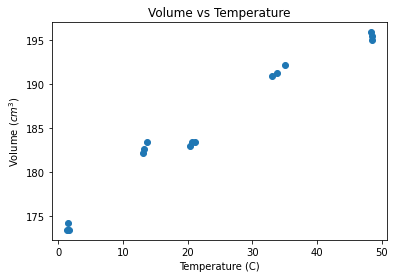

In [5]:
plt.plot(df["temp"], df["volume"], "o")
plt.title("Volume vs Temperature")
plt.xlabel("Temperature (C)")
plt.ylabel("Volume ($cm^3$)");

In [6]:
# df["volume_err"] = df["temp_err"] * df["height"] * A_piston

In [7]:
df

,temp,temp_err,height,volume
0,1.537,0.0660,1.10,174.295560
1,21.130,0.0042,2.20,183.420905
2,1.385,0.0095,1.00,173.465984
3,20.700,0.0047,2.20,183.420905
4,1.635,0.0039,1.00,173.465984
5,20.350,0.0057,2.15,183.006117
6,48.410,0.0083,3.60,195.034981
7,48.430,0.0057,3.65,195.449769
8,48.370,0.0057,3.70,195.864557
9,35.010,0.0100,3.25,192.131462


In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()
lr.fit(df[["temp"]], df["volume"])
lr.coef_

array([0.45569705])

In [10]:
lr.intercept_

174.58156002569018

In [11]:
-lr.intercept_/lr.coef_

array([-383.10881904])

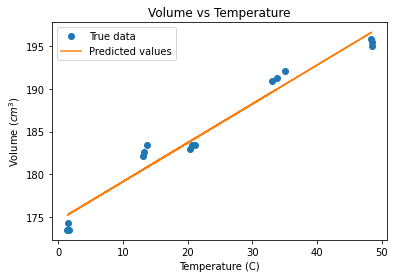

In [12]:
plt.plot(df["temp"], df["volume"], "o", label="True data")
plt.plot(df["temp"], lr.predict(df[["temp"]]), "-", label="Predicted values")
plt.title("Volume vs Temperature")
plt.xlabel("Temperature (C)")
plt.legend()
plt.ylabel("Volume ($cm^3$)");

In [13]:
from sklearn.metrics import r2_score

In [14]:
r2_score(df["volume"], lr.predict(df[["temp"]]))

0.9615678409065225

In [18]:
import statsmodels.api as sm
x = sm.tools.add_constant(df["temp"])
y = df["volume"]
ols = sm.OLS(y, x)
ols_result = ols.fit()
ols_result.summary()

C:\Users\mingf\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\mingf\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 volume   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     325.3
Date:                Sun, 17 Apr 2022   Prob (F-statistic):           1.39e-10
Time:                        14:50:15   Log-Likelihood:                -27.187
No. Observations:                  15   AIC:                             58.37
Df Residuals:                      13   BIC:                             59.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        174.5816      0.724    241.150      0.000     173.018     176.146
temp           0.4557      0.025     18.035      0.000       0.401       0.510
==============================================================================
Omnibus:                        5.073   Durbin-Watson:                   0.425
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                1.653
Skew:                           0.355   Prob(JB):                        0.437
Kurtosis:                       1.537   Cond. No.                         50.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
true_abs_zero = -273.15